In [1]:
import datasets
from tracker import ClientTracker, PunishedClientPool, make_client
import numpy as np
import numpy as np
import flwr as fl
from federated_learning import CustomFedAvgWithDetection
from torch.utils.data import Subset
from torchvision import datasets, transforms

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-15 08:54:53,868	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [9]:
# --- 학습 시작 ---
def start_federated_learning(penalty_threshold=3, penalty_mode: str = "accumulated", switch_round=15, consecutive_mode=False, decay=5):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    full_data = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
    partitions = [Subset(full_data, idx) for idx in np.array_split(np.random.permutation(len(full_data)), 10)]
    tracker = ClientTracker()

    labels = ["normal"] * 5 + ["lazy", "random", "echo", "small", "normal"]
    clients = [make_client(i, partitions[i], labels[i]) for i in range(10)]
    assert len(labels) == len(partitions), "라벨 수가 클라이언트 수와 일치하지 않습니다."

    pool = PunishedClientPool(clients, partitions, consecutive_mode=consecutive_mode)

    fl.simulation.start_simulation(
        client_fn=pool.get_client_fn(),
        num_clients=10,
        config=fl.server.ServerConfig(num_rounds=30),
        strategy = CustomFedAvgWithDetection(
            pool,
            dagmm_model_path="dagmm_rf12_10.pth",
            svm_model_path="svm_rf12_10.pkl",
            iforest_model_path="iforest_rf12_10.pkl",
            meta_model_path="meta_classifier_rf12_10.pkl",
            tracker=tracker,
            penalty_threshold=penalty_threshold,  # 또는 6 으로 바꿔가며 실험
            penalty_mode=penalty_mode,
            switch_round=switch_round,
            eval_dataset=full_data,
            decay=decay
        )
    )

    return tracker  # 마지막에 반드시 추가

In [3]:
import ray
ray.shutdown()

Files already downloaded and verified


c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\federated_learning.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.dagmm

(ClientAppActor pid=23652) [EchoClient] Round 1: returning current parameters (initial phase)


INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 1...
[DEBUG] CID: 9, True: normal, Distance: 0.8576
[⚠️] Client 9 penalized based on distance: 0.8576
[DEBUG] CID: 0, True: normal, Distance: 0.8556
[⚠️] Client 0 penalized based on distance: 0.8556
[DEBUG] CID: 6, True: random, Distance: 0.0147
[DEBUG] CID: 7, True: echo, Distance: 0.8622
[⚠️] Client 7 penalized based on distance: 0.8622
[DEBUG] CID: 8, True: small, Distance: 0.8603
[⚠️] Client 8 penalized based on distance: 0.8603
[DEBUG] CID: 5, True: lazy, Distance: 0.8576
[⚠️] Client 5 penalized based on distance: 0.8576
[DEBUG] CID: 3, True: normal, Distance: 0.8540
[⚠️] Client 3 penalized based on distance: 0.8540
[DEBUG] CID: 4, True: normal, Distance: 0.8543
[⚠️] Client 4 penalized based on distance: 0.8543
[DEBUG] CID: 2, True: normal, Distance: 0.8574
[⚠️] Client 2 penalized based on distance: 0.8574
[DEBUG] CID: 1, True: normal, Distance: 0.8570
[⚠️] Client 1 penalized based on distance: 0.8570


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=21692) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=21692)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=21692)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18

(ClientAppActor pid=21692) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=20612) 
(C

[INFO] Aggregating results for round 2...
[DEBUG] CID: 1, True: normal, Distance: 0.3405
[⚠️] Client 1 penalized based on distance: 0.3405
[DEBUG] CID: 3, True: normal, Distance: 0.3403
[⚠️] Client 3 penalized based on distance: 0.3403
[DEBUG] CID: 0, True: normal, Distance: 0.3402
[⚠️] Client 0 penalized based on distance: 0.3402
[DEBUG] CID: 9, True: normal, Distance: 0.3399
[⚠️] Client 9 penalized based on distance: 0.3399
[DEBUG] CID: 8, True: small, Distance: 0.3327
[⚠️] Client 8 penalized based on distance: 0.3327
[DEBUG] CID: 2, True: normal, Distance: 0.3406
[⚠️] Client 2 penalized based on distance: 0.3406
[DEBUG] CID: 5, True: lazy, Distance: 0.3319
[⚠️] Client 5 penalized based on distance: 0.3319
[DEBUG] CID: 7, True: echo, Distance: 0.3324
[⚠️] Client 7 penalized based on distance: 0.3324
[DEBUG] CID: 4, True: normal, Distance: 0.3400
[⚠️] Client 4 penalized based on distance: 0.3400
[DEBUG] CID: 6, True: random, Distance: 0.2576


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=20612) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=20612)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=20612)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=

(ClientAppActor pid=18648) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\block

[INFO] Aggregating results for round 3...
[DEBUG] CID: 8, True: small, Distance: 0.2351
[DEBUG] CID: 3, True: normal, Distance: 0.2398
[DEBUG] CID: 4, True: normal, Distance: 0.2400
[DEBUG] CID: 7, True: echo, Distance: 0.2349
[DEBUG] CID: 2, True: normal, Distance: 0.2396
[DEBUG] CID: 1, True: normal, Distance: 0.2395
[DEBUG] CID: 6, True: random, Distance: 0.3608
[⚠️] Client 6 penalized based on distance: 0.3608
[DEBUG] CID: 0, True: normal, Distance: 0.2394
[DEBUG] CID: 9, True: normal, Distance: 0.2401
[DEBUG] CID: 5, True: lazy, Distance: 0.2344


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=16584) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=16584)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=16584)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=

(ClientAppActor pid=18272) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 4...
[DEBUG] CID: 8, True: small, Distance: 0.1905
[DEBUG] CID: 4, True: normal, Distance: 0.1934
[DEBUG] CID: 9, True: normal, Distance: 0.1936
[DEBUG] CID: 5, True: lazy, Distance: 0.1899
[DEBUG] CID: 6, True: random, Distance: 0.4132
[⚠️] Client 6 penalized based on distance: 0.4132
[DEBUG] CID: 7, True: echo, Distance: 0.1902
[DEBUG] CID: 3, True: normal, Distance: 0.1942
[DEBUG] CID: 2, True: normal, Distance: 0.1936
[DEBUG] CID: 0, True: normal, Distance: 0.1941
[DEBUG] CID: 1, True: normal, Distance: 0.1942


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=21692) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=21692)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=21692)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=

(ClientAppActor pid=20612) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=12136) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=12136)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=12136)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcn

[INFO] Aggregating results for round 5...
[DEBUG] CID: 8, True: small, Distance: 0.1656
[DEBUG] CID: 9, True: normal, Distance: 0.1681
[DEBUG] CID: 0, True: normal, Distance: 0.1684
[DEBUG] CID: 5, True: lazy, Distance: 0.1651
[DEBUG] CID: 7, True: echo, Distance: 0.1653
[DEBUG] CID: 4, True: normal, Distance: 0.1681
[DEBUG] CID: 1, True: normal, Distance: 0.1680
[DEBUG] CID: 6, True: random, Distance: 0.4484
[⚠️] Client 6 penalized based on distance: 0.4484
[DEBUG] CID: 2, True: normal, Distance: 0.1683
[DEBUG] CID: 3, True: normal, Distance: 0.1681


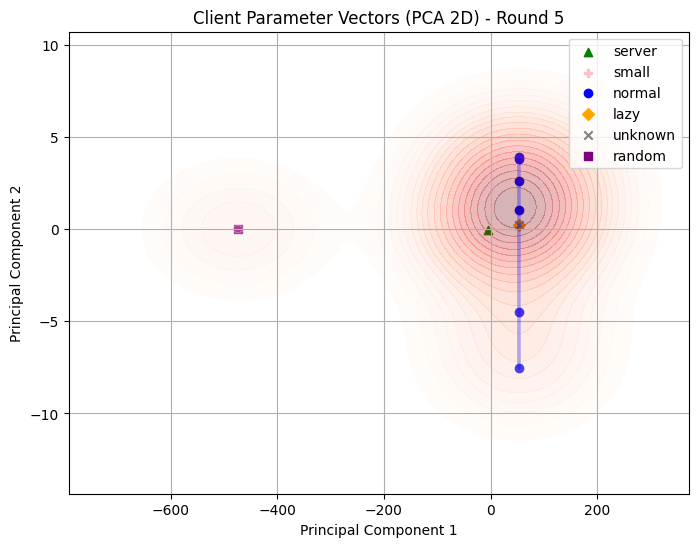

c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\tracker.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues_r') if label == 'random' else cm.get_cmap('Oranges')


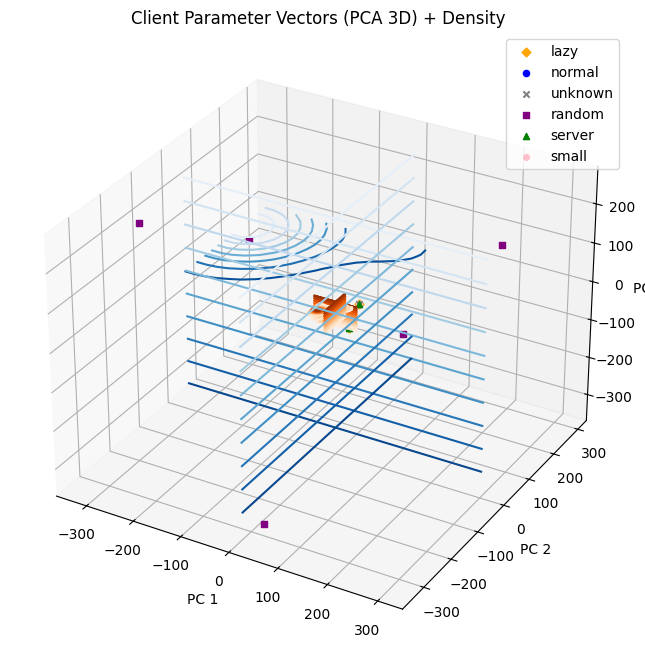

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=20852) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=20852)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=20852)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18

(ClientAppActor pid=16584) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18272) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=18272)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=18272)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-f

[INFO] Aggregating results for round 6...
[DEBUG] CID: 3, True: normal, Distance: 0.1538
[DEBUG] CID: 2, True: normal, Distance: 0.1539
[DEBUG] CID: 5, True: lazy, Distance: 0.1514
[DEBUG] CID: 0, True: normal, Distance: 0.1537
[DEBUG] CID: 9, True: normal, Distance: 0.1540
[DEBUG] CID: 4, True: normal, Distance: 0.1537
[DEBUG] CID: 1, True: normal, Distance: 0.1541
[DEBUG] CID: 8, True: small, Distance: 0.1518
[DEBUG] CID: 6, True: random, Distance: 0.4754
[⚠️] Client 6 penalized based on distance: 0.4754
[DEBUG] CID: 7, True: echo, Distance: 0.1515


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=23652) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=23652)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=23652)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=

(ClientAppActor pid=18272) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=20612) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=20612)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=20612)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-fro

[INFO] Aggregating results for round 7...
[DEBUG] CID: 2, True: normal, Distance: 0.1424
[DEBUG] CID: 5, True: lazy, Distance: 0.1398
[DEBUG] CID: 9, True: normal, Distance: 0.1423
[DEBUG] CID: 7, True: echo, Distance: 0.1400
[DEBUG] CID: 4, True: normal, Distance: 0.1425
[DEBUG] CID: 1, True: normal, Distance: 0.1424
[DEBUG] CID: 3, True: normal, Distance: 0.1423
[DEBUG] CID: 8, True: small, Distance: 0.1401
[DEBUG] CID: 6, True: random, Distance: 0.4895
[⚠️] Client 6 penalized based on distance: 0.4895
[DEBUG] CID: 0, True: normal, Distance: 0.1423


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=8988) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=8988)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=8988)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=21692) 

(ClientAppActor pid=23652) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=21692) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=21692)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=21692)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18272) 
(C

[INFO] Aggregating results for round 8...
[DEBUG] CID: 8, True: small, Distance: 0.1333
[DEBUG] CID: 5, True: lazy, Distance: 0.1329
[DEBUG] CID: 3, True: normal, Distance: 0.1353
[DEBUG] CID: 6, True: random, Distance: 0.5021
[⚠️] Client 6 penalized based on distance: 0.5021
[DEBUG] CID: 0, True: normal, Distance: 0.1352
[DEBUG] CID: 9, True: normal, Distance: 0.1351
[DEBUG] CID: 4, True: normal, Distance: 0.1353
[DEBUG] CID: 7, True: echo, Distance: 0.1330
[DEBUG] CID: 1, True: normal, Distance: 0.1355
[DEBUG] CID: 2, True: normal, Distance: 0.1353


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18272) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18272)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18272)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18

(ClientAppActor pid=8988) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 9...
[DEBUG] CID: 3, True: normal, Distance: 0.1298
[DEBUG] CID: 4, True: normal, Distance: 0.1297
[DEBUG] CID: 0, True: normal, Distance: 0.1299
[DEBUG] CID: 2, True: normal, Distance: 0.1299
[DEBUG] CID: 5, True: lazy, Distance: 0.1278
[DEBUG] CID: 7, True: echo, Distance: 0.1279
[DEBUG] CID: 1, True: normal, Distance: 0.1300
[DEBUG] CID: 6, True: random, Distance: 0.5097
[⚠️] Client 6 penalized based on distance: 0.5097
[DEBUG] CID: 8, True: small, Distance: 0.1281
[DEBUG] CID: 9, True: normal, Distance: 0.1298


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=23652) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=23652)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=23652)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=

(ClientAppActor pid=18648) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=12136) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=12136)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=12136)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-fro

[INFO] Aggregating results for round 10...
[DEBUG] CID: 0, True: normal, Distance: 0.1253
[DEBUG] CID: 5, True: lazy, Distance: 0.1233
[DEBUG] CID: 2, True: normal, Distance: 0.1253
[DEBUG] CID: 7, True: echo, Distance: 0.1235
[DEBUG] CID: 9, True: normal, Distance: 0.1254
[DEBUG] CID: 3, True: normal, Distance: 0.1254
[DEBUG] CID: 6, True: random, Distance: 0.5188
[⚠️] Client 6 penalized based on distance: 0.5188
[DEBUG] CID: 4, True: normal, Distance: 0.1255
[DEBUG] CID: 8, True: small, Distance: 0.1236
[DEBUG] CID: 1, True: normal, Distance: 0.1253


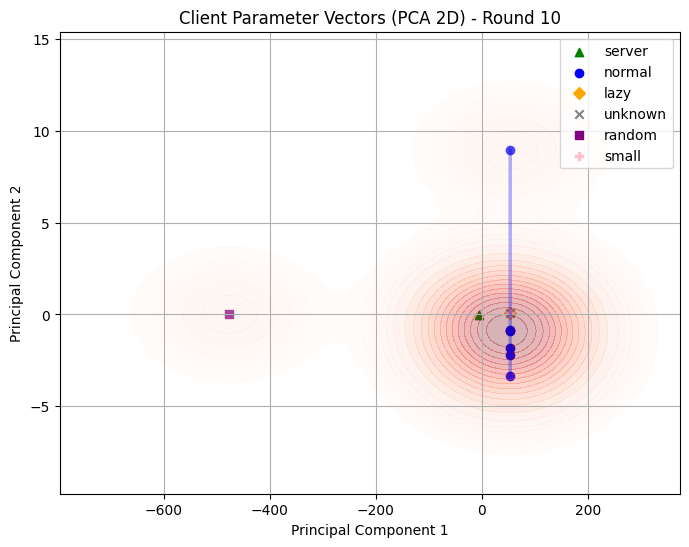

c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\tracker.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues_r') if label == 'random' else cm.get_cmap('Oranges')


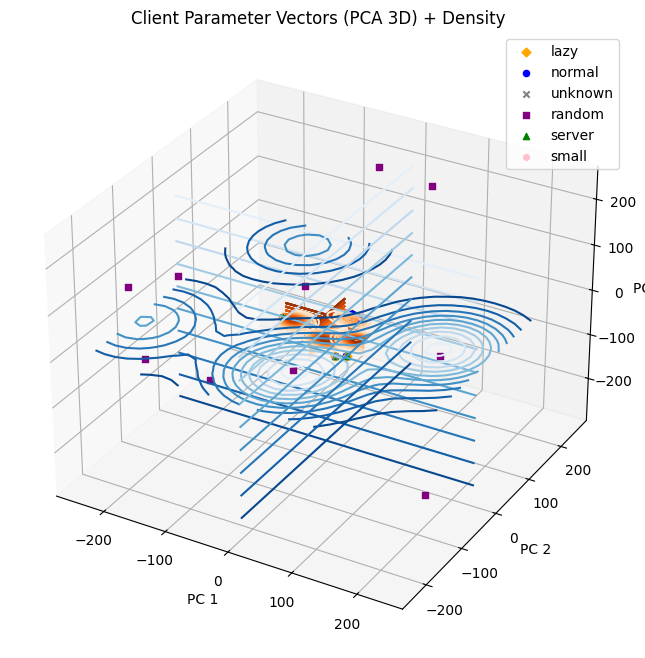

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=20612) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=20612)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=20612)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=20

(ClientAppActor pid=12136) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 11...
[DEBUG] CID: 5, True: lazy, Distance: 0.1215
[DEBUG] CID: 8, True: small, Distance: 0.1218
[DEBUG] CID: 3, True: normal, Distance: 0.1237
[DEBUG] CID: 2, True: normal, Distance: 0.1236
[DEBUG] CID: 1, True: normal, Distance: 0.1234
[DEBUG] CID: 6, True: random, Distance: 0.5258
[⚠️] Client 6 penalized based on distance: 0.5258
[DEBUG] CID: 4, True: normal, Distance: 0.1234
[DEBUG] CID: 7, True: echo, Distance: 0.1216
[DEBUG] CID: 9, True: normal, Distance: 0.1233
[DEBUG] CID: 0, True: normal, Distance: 0.1235


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=

(ClientAppActor pid=8988) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=20612) 


[INFO] Aggregating results for round 12...
[DEBUG] CID: 6, True: random, Distance: 0.5268
[⚠️] Client 6 penalized based on distance: 0.5268
[DEBUG] CID: 7, True: echo, Distance: 0.1190
[DEBUG] CID: 5, True: lazy, Distance: 0.1189
[DEBUG] CID: 4, True: normal, Distance: 0.1206
[DEBUG] CID: 0, True: normal, Distance: 0.1209
[DEBUG] CID: 2, True: normal, Distance: 0.1207
[DEBUG] CID: 9, True: normal, Distance: 0.1207
[DEBUG] CID: 1, True: normal, Distance: 0.1207
[DEBUG] CID: 3, True: normal, Distance: 0.1209
[DEBUG] CID: 8, True: small, Distance: 0.1192


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18272) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18272)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18272)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=

(ClientAppActor pid=20852) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=16584) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 6x across cluster]
(ClientAppActor pid=16584)             This is a deprecated feature. It will be removed [repeated 6x across cluster]
(ClientAppActor pid=16584)             entirely in future versions of Flower. [repeated 6x across cluster]
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18272) 


[INFO] Aggregating results for round 13...
[DEBUG] CID: 5, True: lazy, Distance: 0.1180
[DEBUG] CID: 3, True: normal, Distance: 0.1199
[DEBUG] CID: 2, True: normal, Distance: 0.1199
[DEBUG] CID: 6, True: random, Distance: 0.5291
[⚠️] Client 6 penalized based on distance: 0.5291
[DEBUG] CID: 8, True: small, Distance: 0.1183
[DEBUG] CID: 4, True: normal, Distance: 0.1197
[DEBUG] CID: 7, True: echo, Distance: 0.1181
[DEBUG] CID: 9, True: normal, Distance: 0.1199
[DEBUG] CID: 0, True: normal, Distance: 0.1198
[DEBUG] CID: 1, True: normal, Distance: 0.1199


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18272) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 3x across cluster]
(ClientAppActor pid=18272)             This is a deprecated feature. It will be removed [repeated 3x across cluster]
(ClientAppActor pid=18272)             entirely in future versions of Flower. [repeated 3x across cluster]
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=

(ClientAppActor pid=12136) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=12136) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=12136)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=12136)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
INFO :      aggregate_fit: rec

[INFO] Aggregating results for round 14...
[DEBUG] CID: 6, True: random, Distance: 0.5340
[⚠️] Client 6 penalized based on distance: 0.5340
[DEBUG] CID: 0, True: normal, Distance: 0.1177
[DEBUG] CID: 9, True: normal, Distance: 0.1177
[DEBUG] CID: 4, True: normal, Distance: 0.1176
[DEBUG] CID: 1, True: normal, Distance: 0.1177
[DEBUG] CID: 5, True: lazy, Distance: 0.1160
[DEBUG] CID: 2, True: normal, Distance: 0.1178
[DEBUG] CID: 7, True: echo, Distance: 0.1161
[DEBUG] CID: 8, True: small, Distance: 0.1163
[DEBUG] CID: 3, True: normal, Distance: 0.1177


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=16

(ClientAppActor pid=20852) [EchoClient] Round 1: returning current parameters (initial phase)


INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 15...
[DEBUG] CID: 9, True: normal, Distance: 0.1171
[DEBUG] CID: 1, True: normal, Distance: 0.1173
[DEBUG] CID: 4, True: normal, Distance: 0.1172
[DEBUG] CID: 7, True: echo, Distance: 0.1155
[DEBUG] CID: 8, True: small, Distance: 0.1157
[DEBUG] CID: 5, True: lazy, Distance: 0.1154
[DEBUG] CID: 6, True: random, Distance: 0.5350
[⚠️] Client 6 penalized based on distance: 0.5350
[DEBUG] CID: 3, True: normal, Distance: 0.1174
[DEBUG] CID: 2, True: normal, Distance: 0.1171
[DEBUG] CID: 0, True: normal, Distance: 0.1172


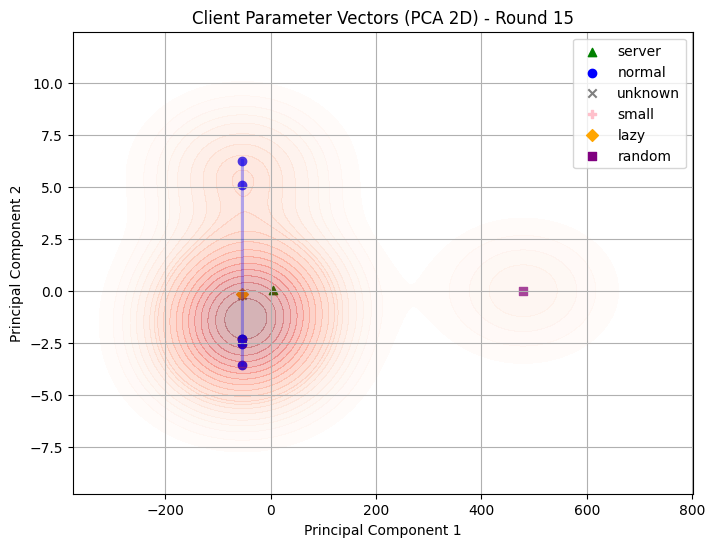

c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\tracker.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues_r') if label == 'random' else cm.get_cmap('Oranges')


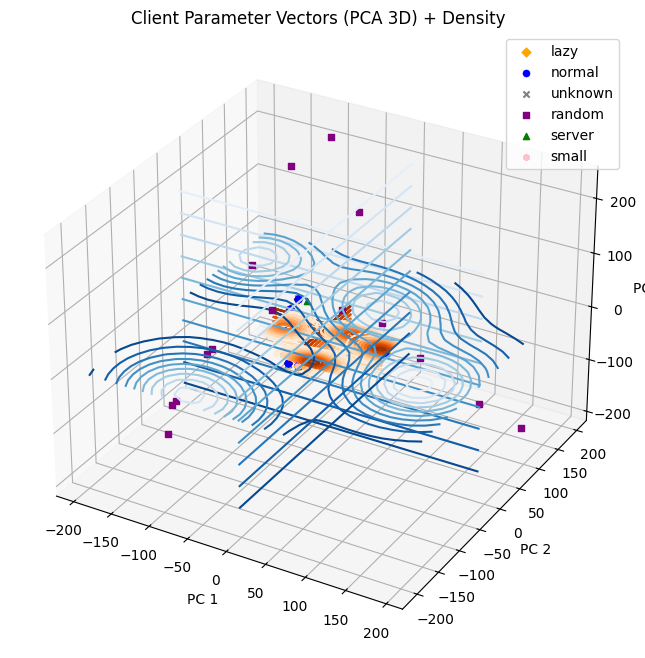

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18760) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18760)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18760)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=

(ClientAppActor pid=18760) [EchoClient] Round 1: returning current parameters (initial phase)


INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 16...
[DEBUG] CID: 9, True: normal, Distance: 0.1165
[DEBUG] CID: 0, True: normal, Distance: 0.1165
[DEBUG] CID: 5, True: lazy, Distance: 0.1146
[DEBUG] CID: 6, True: random, Distance: 0.5380
[⚠️] Client 6 penalized based on distance: 0.5380
[DEBUG] CID: 3, True: normal, Distance: 0.1166
[DEBUG] CID: 2, True: normal, Distance: 0.1164
[DEBUG] CID: 7, True: echo, Distance: 0.1147
[DEBUG] CID: 4, True: normal, Distance: 0.1163
[DEBUG] CID: 8, True: small, Distance: 0.1149
[DEBUG] CID: 1, True: normal, Distance: 0.1163


INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18272) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18272)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18272)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=

(ClientAppActor pid=16584) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=12136) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=12136)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=12136)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18760) W

[INFO] Aggregating results for round 17...
[DEBUG] CID: 4, True: normal, Distance: 0.1160
[⚠️] Client 4 penalized based on distance: 0.1160
[DEBUG] CID: 2, True: normal, Distance: 0.1160
[⚠️] Client 2 penalized based on distance: 0.1160
[DEBUG] CID: 8, True: small, Distance: 0.1145
[⚠️] Client 8 penalized based on distance: 0.1145
[DEBUG] CID: 9, True: normal, Distance: 0.1160
[⚠️] Client 9 penalized based on distance: 0.1160
[DEBUG] CID: 6, True: random, Distance: 0.5375
[⚠️] Client 6 penalized based on distance: 0.5375
[DEBUG] CID: 7, True: echo, Distance: 0.1144
[⚠️] Client 7 penalized based on distance: 0.1144
[DEBUG] CID: 5, True: lazy, Distance: 0.1143
[⚠️] Client 5 penalized based on distance: 0.1143
[DEBUG] CID: 1, True: normal, Distance: 0.1159
[⚠️] Client 1 penalized based on distance: 0.1159
[DEBUG] CID: 3, True: normal, Distance: 0.1161
[⚠️] Client 3 penalized based on distance: 0.1161
[DEBUG] CID: 0, True: normal, Distance: 0.1158
[⚠️] Client 0 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=20852) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 3x across cluster]
(ClientAppActor pid=20852)             This is a deprecated feature. It will be removed [repeated 3x across cluster]
(ClientAppActor pid=20852)             entirely in future versions of Flower. [repeated 3x across cluster]
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18

(ClientAppActor pid=18648) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=20612) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=20612)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=20612)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=16584) 
(C

[INFO] Aggregating results for round 18...
[DEBUG] CID: 1, True: normal, Distance: 0.1152
[⚠️] Client 1 penalized based on distance: 0.1152
[DEBUG] CID: 4, True: normal, Distance: 0.1152
[⚠️] Client 4 penalized based on distance: 0.1152
[DEBUG] CID: 8, True: small, Distance: 0.1137
[⚠️] Client 8 penalized based on distance: 0.1137
[DEBUG] CID: 5, True: lazy, Distance: 0.1135
[⚠️] Client 5 penalized based on distance: 0.1135
[DEBUG] CID: 6, True: random, Distance: 0.5393
[⚠️] Client 6 penalized based on distance: 0.5393
[DEBUG] CID: 3, True: normal, Distance: 0.1153
[⚠️] Client 3 penalized based on distance: 0.1153
[DEBUG] CID: 2, True: normal, Distance: 0.1153
[⚠️] Client 2 penalized based on distance: 0.1153
[DEBUG] CID: 7, True: echo, Distance: 0.1136
[⚠️] Client 7 penalized based on distance: 0.1136
[DEBUG] CID: 0, True: normal, Distance: 0.1152
[⚠️] Client 0 penalized based on distance: 0.1152
[DEBUG] CID: 9, True: normal, Distance: 0.1153
[⚠️] Client 9 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=16584) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=16584)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=16584)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=89

(ClientAppActor pid=18272) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 19...
[DEBUG] CID: 1, True: normal, Distance: 0.1144
[⚠️] Client 1 penalized based on distance: 0.1144
[DEBUG] CID: 8, True: small, Distance: 0.1129
[⚠️] Client 8 penalized based on distance: 0.1129
[DEBUG] CID: 9, True: normal, Distance: 0.1142
[⚠️] Client 9 penalized based on distance: 0.1142
[DEBUG] CID: 2, True: normal, Distance: 0.1143
[⚠️] Client 2 penalized based on distance: 0.1143
[DEBUG] CID: 5, True: lazy, Distance: 0.1127
[⚠️] Client 5 penalized based on distance: 0.1127
[DEBUG] CID: 6, True: random, Distance: 0.5408
[⚠️] Client 6 penalized based on distance: 0.5408
[DEBUG] CID: 7, True: echo, Distance: 0.1128
[⚠️] Client 7 penalized based on distance: 0.1128
[DEBUG] CID: 4, True: normal, Distance: 0.1144
[⚠️] Client 4 penalized based on distance: 0.1144
[DEBUG] CID: 0, True: normal, Distance: 0.1145
[⚠️] Client 0 penalized based on distance: 0.1145
[DEBUG] CID: 3, True: normal, Distance: 0.1144
[⚠️] Client 3 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=23

(ClientAppActor pid=23652) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 20...
[DEBUG] CID: 7, True: echo, Distance: 0.1130
[⚠️] Client 7 penalized based on distance: 0.1130
[DEBUG] CID: 2, True: normal, Distance: 0.1146
[⚠️] Client 2 penalized based on distance: 0.1146
[DEBUG] CID: 9, True: normal, Distance: 0.1144
[⚠️] Client 9 penalized based on distance: 0.1144
[DEBUG] CID: 0, True: normal, Distance: 0.1146
[⚠️] Client 0 penalized based on distance: 0.1146
[DEBUG] CID: 6, True: random, Distance: 0.5379
[⚠️] Client 6 penalized based on distance: 0.5379
[DEBUG] CID: 4, True: normal, Distance: 0.1145
[⚠️] Client 4 penalized based on distance: 0.1145
[DEBUG] CID: 8, True: small, Distance: 0.1131
[⚠️] Client 8 penalized based on distance: 0.1131
[DEBUG] CID: 5, True: lazy, Distance: 0.1129
[⚠️] Client 5 penalized based on distance: 0.1129
[DEBUG] CID: 1, True: normal, Distance: 0.1145
[⚠️] Client 1 penalized based on distance: 0.1145
[DEBUG] CID: 3, True: normal, Distance: 0.1146
[⚠️] Client 3 penalized based on distance:

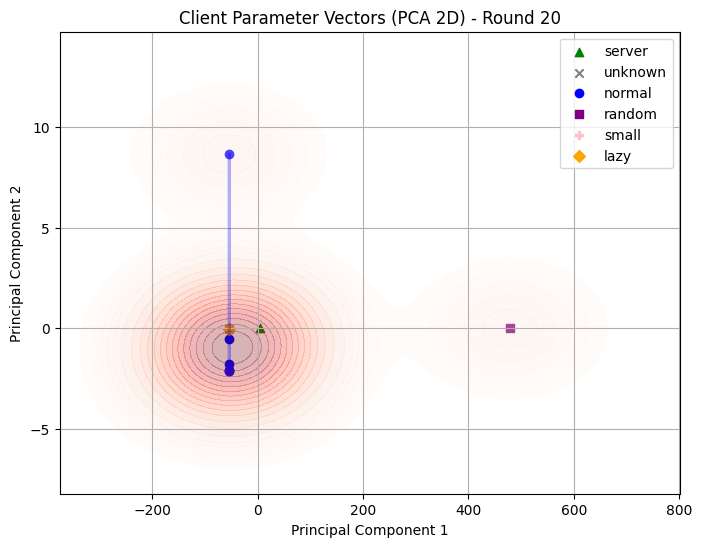

c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\tracker.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues_r') if label == 'random' else cm.get_cmap('Oranges')


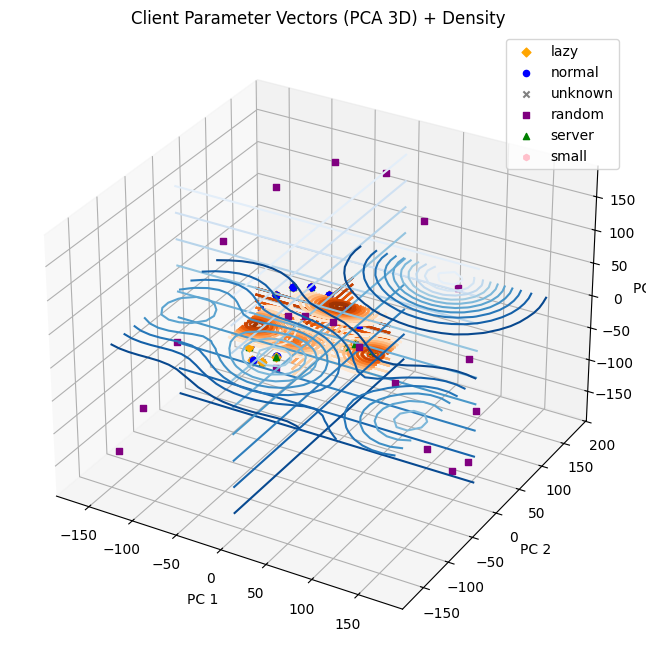

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18760) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18760)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18760)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=12

(ClientAppActor pid=20612) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 21...
[DEBUG] CID: 6, True: random, Distance: 0.5389
[⚠️] Client 6 penalized based on distance: 0.5389
[DEBUG] CID: 3, True: normal, Distance: 0.1144
[⚠️] Client 3 penalized based on distance: 0.1144
[DEBUG] CID: 1, True: normal, Distance: 0.1142
[⚠️] Client 1 penalized based on distance: 0.1142
[DEBUG] CID: 4, True: normal, Distance: 0.1143
[⚠️] Client 4 penalized based on distance: 0.1143
[DEBUG] CID: 2, True: normal, Distance: 0.1143
[⚠️] Client 2 penalized based on distance: 0.1143
[DEBUG] CID: 9, True: normal, Distance: 0.1144
[⚠️] Client 9 penalized based on distance: 0.1144
[DEBUG] CID: 8, True: small, Distance: 0.1129
[⚠️] Client 8 penalized based on distance: 0.1129
[DEBUG] CID: 0, True: normal, Distance: 0.1142
[⚠️] Client 0 penalized based on distance: 0.1142
[DEBUG] CID: 5, True: lazy, Distance: 0.1127
[⚠️] Client 5 penalized based on distance: 0.1127
[DEBUG] CID: 7, True: echo, Distance: 0.1128
[⚠️] Client 7 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=18760) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18760)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18760)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=23

(ClientAppActor pid=23652) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 22...
[DEBUG] CID: 8, True: small, Distance: 0.1128
[⚠️] Client 8 penalized based on distance: 0.1128
[DEBUG] CID: 6, True: random, Distance: 0.5411
[⚠️] Client 6 penalized based on distance: 0.5411
[DEBUG] CID: 4, True: normal, Distance: 0.1141
[⚠️] Client 4 penalized based on distance: 0.1141
[DEBUG] CID: 0, True: normal, Distance: 0.1143
[⚠️] Client 0 penalized based on distance: 0.1143
[DEBUG] CID: 1, True: normal, Distance: 0.1143
[⚠️] Client 1 penalized based on distance: 0.1143
[DEBUG] CID: 3, True: normal, Distance: 0.1143
[⚠️] Client 3 penalized based on distance: 0.1143
[DEBUG] CID: 5, True: lazy, Distance: 0.1126
[⚠️] Client 5 penalized based on distance: 0.1126
[DEBUG] CID: 7, True: echo, Distance: 0.1127
[⚠️] Client 7 penalized based on distance: 0.1127
[DEBUG] CID: 2, True: normal, Distance: 0.1143
[⚠️] Client 2 penalized based on distance: 0.1143
[DEBUG] CID: 9, True: normal, Distance: 0.1143
[⚠️] Client 9 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18272) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18272)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18272)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=

(ClientAppActor pid=20852) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=12136) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=12136)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=12136)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=21692) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signatu

[INFO] Aggregating results for round 23...
[DEBUG] CID: 6, True: random, Distance: 0.5409
[⚠️] Client 6 penalized based on distance: 0.5409
[DEBUG] CID: 0, True: normal, Distance: 0.1135
[⚠️] Client 0 penalized based on distance: 0.1135
[DEBUG] CID: 1, True: normal, Distance: 0.1135
[⚠️] Client 1 penalized based on distance: 0.1135
[DEBUG] CID: 5, True: lazy, Distance: 0.1118
[⚠️] Client 5 penalized based on distance: 0.1118
[DEBUG] CID: 7, True: echo, Distance: 0.1120
[⚠️] Client 7 penalized based on distance: 0.1120
[DEBUG] CID: 9, True: normal, Distance: 0.1136
[⚠️] Client 9 penalized based on distance: 0.1136
[DEBUG] CID: 3, True: normal, Distance: 0.1136
[⚠️] Client 3 penalized based on distance: 0.1136
[DEBUG] CID: 2, True: normal, Distance: 0.1134
[⚠️] Client 2 penalized based on distance: 0.1134
[DEBUG] CID: 4, True: normal, Distance: 0.1133
[⚠️] Client 4 penalized based on distance: 0.1133
[DEBUG] CID: 8, True: small, Distance: 0.1121
[⚠️] Client 8 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=8988) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=8988)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=8988)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18760) 

(ClientAppActor pid=20612) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 6x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 6x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 6x across cluster]
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=21692) 
(C

[INFO] Aggregating results for round 24...
[DEBUG] CID: 9, True: normal, Distance: 0.1135
[⚠️] Client 9 penalized based on distance: 0.1135
[DEBUG] CID: 8, True: small, Distance: 0.1120
[⚠️] Client 8 penalized based on distance: 0.1120
[DEBUG] CID: 1, True: normal, Distance: 0.1133
[⚠️] Client 1 penalized based on distance: 0.1133
[DEBUG] CID: 0, True: normal, Distance: 0.1134
[⚠️] Client 0 penalized based on distance: 0.1134
[DEBUG] CID: 6, True: random, Distance: 0.5383
[⚠️] Client 6 penalized based on distance: 0.5383
[DEBUG] CID: 4, True: normal, Distance: 0.1134
[⚠️] Client 4 penalized based on distance: 0.1134
[DEBUG] CID: 5, True: lazy, Distance: 0.1117
[⚠️] Client 5 penalized based on distance: 0.1117
[DEBUG] CID: 3, True: normal, Distance: 0.1134
[⚠️] Client 3 penalized based on distance: 0.1134
[DEBUG] CID: 7, True: echo, Distance: 0.1118
[⚠️] Client 7 penalized based on distance: 0.1118
[DEBUG] CID: 2, True: normal, Distance: 0.1133
[⚠️] Client 2 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=21692) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 3x across cluster]
(ClientAppActor pid=21692)             This is a deprecated feature. It will be removed [repeated 3x across cluster]
(ClientAppActor pid=21692)             entirely in future versions of Flower. [repeated 3x across cluster]
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=12

(ClientAppActor pid=18272) [EchoClient] Round 1: returning current parameters (initial phase)


INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 25...
[DEBUG] CID: 6, True: random, Distance: 0.5420
[⚠️] Client 6 penalized based on distance: 0.5420
[DEBUG] CID: 7, True: echo, Distance: 0.1117
[⚠️] Client 7 penalized based on distance: 0.1117
[DEBUG] CID: 8, True: small, Distance: 0.1117
[⚠️] Client 8 penalized based on distance: 0.1117
[DEBUG] CID: 3, True: normal, Distance: 0.1132
[⚠️] Client 3 penalized based on distance: 0.1132
[DEBUG] CID: 2, True: normal, Distance: 0.1132
[⚠️] Client 2 penalized based on distance: 0.1132
[DEBUG] CID: 1, True: normal, Distance: 0.1134
[⚠️] Client 1 penalized based on distance: 0.1134
[DEBUG] CID: 4, True: normal, Distance: 0.1133
[⚠️] Client 4 penalized based on distance: 0.1133
[DEBUG] CID: 9, True: normal, Distance: 0.1131
[⚠️] Client 9 penalized based on distance: 0.1131
[DEBUG] CID: 5, True: lazy, Distance: 0.1115
[⚠️] Client 5 penalized based on distance: 0.1115
[DEBUG] CID: 0, True: normal, Distance: 0.1133
[⚠️] Client 0 penalized based on distance:

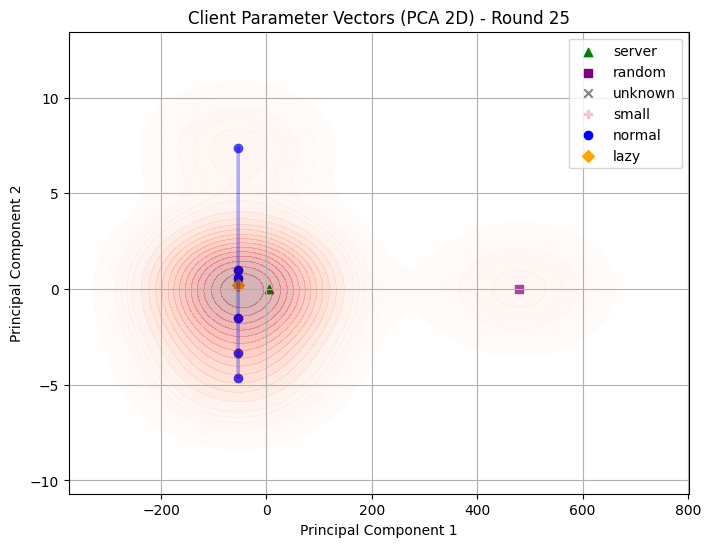

c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\tracker.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues_r') if label == 'random' else cm.get_cmap('Oranges')


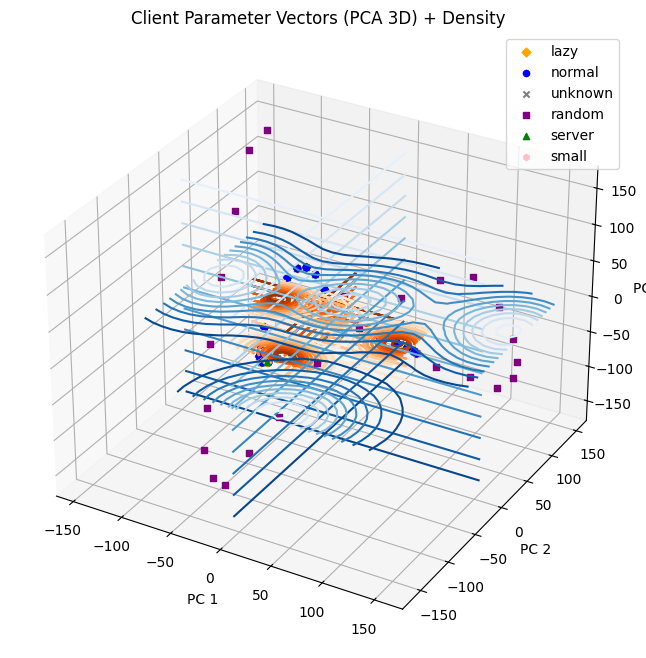

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=23

(ClientAppActor pid=18760) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 26...
[DEBUG] CID: 6, True: random, Distance: 0.5414
[⚠️] Client 6 penalized based on distance: 0.5414
[DEBUG] CID: 3, True: normal, Distance: 0.1134
[⚠️] Client 3 penalized based on distance: 0.1134
[DEBUG] CID: 7, True: echo, Distance: 0.1119
[⚠️] Client 7 penalized based on distance: 0.1119
[DEBUG] CID: 1, True: normal, Distance: 0.1133
[⚠️] Client 1 penalized based on distance: 0.1133
[DEBUG] CID: 8, True: small, Distance: 0.1120
[⚠️] Client 8 penalized based on distance: 0.1120
[DEBUG] CID: 0, True: normal, Distance: 0.1133
[⚠️] Client 0 penalized based on distance: 0.1133
[DEBUG] CID: 2, True: normal, Distance: 0.1134
[⚠️] Client 2 penalized based on distance: 0.1134
[DEBUG] CID: 5, True: lazy, Distance: 0.1118
[⚠️] Client 5 penalized based on distance: 0.1118
[DEBUG] CID: 4, True: normal, Distance: 0.1134
[⚠️] Client 4 penalized based on distance: 0.1134
[DEBUG] CID: 9, True: normal, Distance: 0.1134
[⚠️] Client 9 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=16584) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=16584)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=16584)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=

(ClientAppActor pid=12136) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=8988) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 6x across cluster]
(ClientAppActor pid=8988)             This is a deprecated feature. It will be removed [repeated 6x across cluster]
(ClientAppActor pid=8988)             entirely in future versions of Flower. [repeated 6x across cluster]
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() 

[INFO] Aggregating results for round 27...
[DEBUG] CID: 6, True: random, Distance: 0.5397
[⚠️] Client 6 penalized based on distance: 0.5397
[DEBUG] CID: 1, True: normal, Distance: 0.1134
[⚠️] Client 1 penalized based on distance: 0.1134
[DEBUG] CID: 0, True: normal, Distance: 0.1134
[⚠️] Client 0 penalized based on distance: 0.1134
[DEBUG] CID: 2, True: normal, Distance: 0.1134
[⚠️] Client 2 penalized based on distance: 0.1134
[DEBUG] CID: 4, True: normal, Distance: 0.1136
[⚠️] Client 4 penalized based on distance: 0.1136
[DEBUG] CID: 7, True: echo, Distance: 0.1120
[⚠️] Client 7 penalized based on distance: 0.1120
[DEBUG] CID: 9, True: normal, Distance: 0.1135
[⚠️] Client 9 penalized based on distance: 0.1135
[DEBUG] CID: 8, True: small, Distance: 0.1120
[⚠️] Client 8 penalized based on distance: 0.1120
[DEBUG] CID: 5, True: lazy, Distance: 0.1118
[⚠️] Client 5 penalized based on distance: 0.1118
[DEBUG] CID: 3, True: normal, Distance: 0.1135
[⚠️] Client 3 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
(ClientAppActor pid=18272) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18272)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18272)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20

(ClientAppActor pid=23652) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18272) 
(ClientAppActor pid=18272)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 28...
[DEBUG] CID: 5, True: lazy, Distance: 0.1112
[⚠️] Client 5 penalized based on distance: 0.1112
[DEBUG] CID: 7, True: echo, Distance: 0.1113
[⚠️] Client 7 penalized based on distance: 0.1113
[DEBUG] CID: 2, True: normal, Distance: 0.1126
[⚠️] Client 2 penalized based on distance: 0.1126
[DEBUG] CID: 8, True: small, Distance: 0.1114
[⚠️] Client 8 penalized based on distance: 0.1114
[DEBUG] CID: 9, True: normal, Distance: 0.1129
[⚠️] Client 9 penalized based on distance: 0.1129
[DEBUG] CID: 0, True: normal, Distance: 0.1128
[⚠️] Client 0 penalized based on distance: 0.1128
[DEBUG] CID: 4, True: normal, Distance: 0.1127
[⚠️] Client 4 penalized based on distance: 0.1127
[DEBUG] CID: 3, True: normal, Distance: 0.1127
[⚠️] Client 3 penalized based on distance: 0.1127
[DEBUG] CID: 1, True: normal, Distance: 0.1129
[⚠️] Client 1 penalized based on distance: 0.1129
[DEBUG] CID: 6, True: random, Distance: 0.5437
[⚠️] Client 6 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=20

(ClientAppActor pid=18272) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=20852) 
(ClientAppActor pid=20852)         
(ClientAppActor pid=20852) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=20852)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=20852)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=8988) 
(ClientAppActor pid=8988)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-fro

[INFO] Aggregating results for round 29...
[DEBUG] CID: 7, True: echo, Distance: 0.1114
[⚠️] Client 7 penalized based on distance: 0.1114
[DEBUG] CID: 0, True: normal, Distance: 0.1129
[⚠️] Client 0 penalized based on distance: 0.1129
[DEBUG] CID: 5, True: lazy, Distance: 0.1113
[⚠️] Client 5 penalized based on distance: 0.1113
[DEBUG] CID: 4, True: normal, Distance: 0.1129
[⚠️] Client 4 penalized based on distance: 0.1129
[DEBUG] CID: 9, True: normal, Distance: 0.1130
[⚠️] Client 9 penalized based on distance: 0.1130
[DEBUG] CID: 8, True: small, Distance: 0.1115
[⚠️] Client 8 penalized based on distance: 0.1115
[DEBUG] CID: 1, True: normal, Distance: 0.1129
[⚠️] Client 1 penalized based on distance: 0.1129
[DEBUG] CID: 6, True: random, Distance: 0.5433
[⚠️] Client 6 penalized based on distance: 0.5433
[DEBUG] CID: 2, True: normal, Distance: 0.1129
[⚠️] Client 2 penalized based on distance: 0.1129
[DEBUG] CID: 3, True: normal, Distance: 0.1129
[⚠️] Client 3 penalized based on distance:

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 5x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 5x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 5x across cluster]
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=20612) 
(ClientAppActor pid=20612)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=16584) 
(ClientAppActor pid=16584)         
(ClientAppActor pid=

(ClientAppActor pid=20852) [EchoClient] Round 1: returning current parameters (initial phase)


(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
INFO :      aggregate_fit: received 10 results and 0 failures
c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\blockchain_module.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "timestamp": datetime.utcnow().isoformat(),


[INFO] Aggregating results for round 30...
[DEBUG] CID: 0, True: normal, Distance: 0.1129
[⚠️] Client 0 penalized based on distance: 0.1129
[DEBUG] CID: 8, True: small, Distance: 0.1115
[⚠️] Client 8 penalized based on distance: 0.1115
[DEBUG] CID: 5, True: lazy, Distance: 0.1113
[⚠️] Client 5 penalized based on distance: 0.1113
[DEBUG] CID: 6, True: random, Distance: 0.5409
[⚠️] Client 6 penalized based on distance: 0.5409
[DEBUG] CID: 7, True: echo, Distance: 0.1114
[⚠️] Client 7 penalized based on distance: 0.1114
[DEBUG] CID: 2, True: normal, Distance: 0.1129
[⚠️] Client 2 penalized based on distance: 0.1129
[DEBUG] CID: 4, True: normal, Distance: 0.1128
[⚠️] Client 4 penalized based on distance: 0.1128
[DEBUG] CID: 3, True: normal, Distance: 0.1128
[⚠️] Client 3 penalized based on distance: 0.1128
[DEBUG] CID: 9, True: normal, Distance: 0.1128
[⚠️] Client 9 penalized based on distance: 0.1128
[DEBUG] CID: 1, True: normal, Distance: 0.1128
[⚠️] Client 1 penalized based on distance:

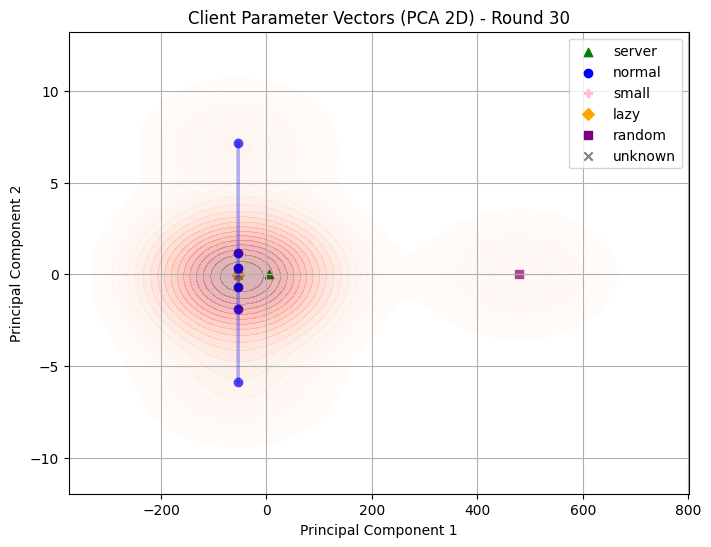

c:\Users\USER\jiyeon\pytorch-from-centralized-to-federated\test_parameters\FL_BC_framework\tracker.py:443: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues_r') if label == 'random' else cm.get_cmap('Oranges')


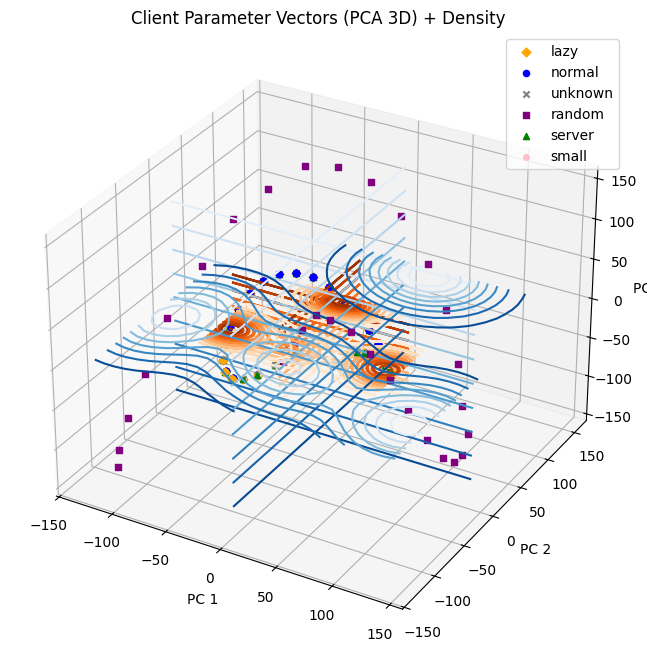

INFO :      configure_evaluate: strategy sampled 10 clients (out of 10)
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18648) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 4x across cluster]
(ClientAppActor pid=18648)             This is a deprecated feature. It will be removed [repeated 4x across cluster]
(ClientAppActor pid=18648)             entirely in future versions of Flower. [repeated 4x across cluster]
(ClientAppActor pid=23652) 
(ClientAppActor pid=23652)         
(ClientAppActor pid=12136) 
(ClientAppActor pid=12136)         
(ClientAppActor pid=18648) 
(ClientAppActor pid=18648)         
(ClientAppActor pid=18760) 
(ClientAppActor pid=18760)         
(ClientAppActor pid=21692) 
(ClientAppActor pid=21692)         
(ClientAppActor pid=

In [10]:
sim_2 = start_federated_learning(penalty_threshold=31, penalty_mode="hybrid", switch_round=30, decay=2)

In [11]:
import re
import csv
from collections import defaultdict

# 🔹 1. 로그 파일 불러오기
with open("distance_log.txt", "r") as f:
    logs = f.readlines()

# 🔸 2. 데이터 저장 구조
type_distances = defaultdict(list)
current_round = None

for line in logs:
    # 라운드 갱신
    if "Aggregating results for round" in line:
        match = re.search(r"round (\d+)", line)
        if match:
            current_round = int(match.group(1))

    # 거리 정보 추출
    elif "Distance" in line:
        match = re.search(r"True: (\w+), Distance: ([0-9.]+)", line)
        if match:
            node_type = match.group(1).lower()
            distance = float(match.group(2))
            type_distances[node_type].append(distance)

# 🔹 3. 전체 거리 목록 저장
with open("all_type_distances.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Node_Type", "Distances"])
    for node_type, distances in type_distances.items():
        writer.writerow([node_type] + distances)

# 🔹 4. 평균 거리 계산 및 저장
with open("average_distance_by_type.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Node_Type", "Count", "Average_Distance"])
    for node_type, distances in type_distances.items():
        avg = sum(distances) / len(distances) if distances else 0
        writer.writerow([node_type, len(distances), round(avg, 6)])


In [15]:
import re
import csv
from collections import defaultdict

# 로그
with open("distance_log.txt", "r") as f:
    logs = f.readlines()

# 데이터 저장용 구조
normal_distances = defaultdict(list)  # key: round 구간 (1~10, 11~20, ...)
abnormal_distances = defaultdict(list)  # key: node type (echo, random, ...)

current_round = None

for line in logs:
    # 라운드 번호 갱신
    if "Aggregating results for round" in line:
        match = re.search(r"round (\d+)", line)
        if match:
            current_round = int(match.group(1))

    # 노드 거리 정보
    elif "Distance" in line:
        match = re.search(r"True: (\w+), Distance: ([0-9.]+)", line)
        if match:
            node_type = match.group(1)
            distance = float(match.group(2))

            if node_type == "lazy":
                if current_round <= 10:
                    key = "round_01_10"
                elif current_round <= 20:
                    key = "round_11_20"
                else:
                    key = "round_21_30"
                normal_distances[key].append(distance)
            else:
                abnormal_distances[node_type].append(distance)

# ✅ normal 평균 거리 저장
with open("lazy_distances_by_round.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Range", "Count", "Avg_Distance"])
    for group, values in normal_distances.items():
        avg = sum(values) / len(values) if values else 0
        writer.writerow([group, len(values), round(avg, 6)])

In [ ]:
import re
import csv
from collections import defaultdict

# 로그
with open("normal_distances_by_round.txt", "r") as f:
    logs = f.readlines()

# 데이터 저장용 구조
normal_distances = defaultdict(list)  # key: round 구간 (1~10, 11~20, ...)
abnormal_distances = defaultdict(list)  # key: node type (echo, random, ...)

current_round = None

for line in logs:
    # 라운드 번호 갱신
    if "Aggregating results for round" in line:
        match = re.search(r"round (\d+)", line)
        if match:
            current_round = int(match.group(1))

    # 노드 거리 정보
    elif "Distance" in line:
        match = re.search(r"True: (\w+), Distance: ([0-9.]+)", line)
        if match:
            node_type = match.group(1)
            distance = float(match.group(2))

            if node_type == "normal":
                if current_round <= 10:
                    key = "round_01_10"
                elif current_round <= 20:
                    key = "round_11_20"
                else:
                    key = "round_21_30"
                normal_distances[key].append(distance)
            else:
                abnormal_distances[node_type].append(distance)

# ✅ normal 평균 거리 저장
with open("normal_distances_by_round.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Range", "Count", "Avg_Distance"])
    for group, values in normal_distances.items():
        avg = sum(values) / len(values) if values else 0
        writer.writerow([group, len(values), round(avg, 6)])